<a href="https://colab.research.google.com/github/SzymonGogulski/REKRUTACJA_AKAI_2023/blob/main/Models/1_Test_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import statements and loading data**

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


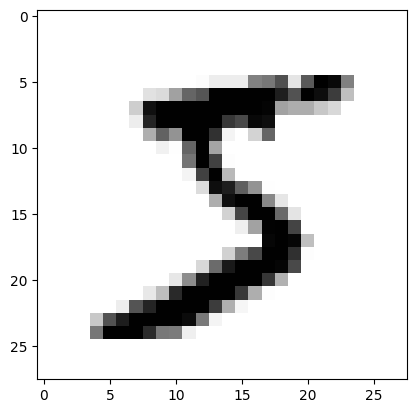

In [ ]:
print(X_train.shape)
plt.imshow(X_train[0], cmap="binary")

Data was loaded correctly

# **Check if training data is balanced**

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64


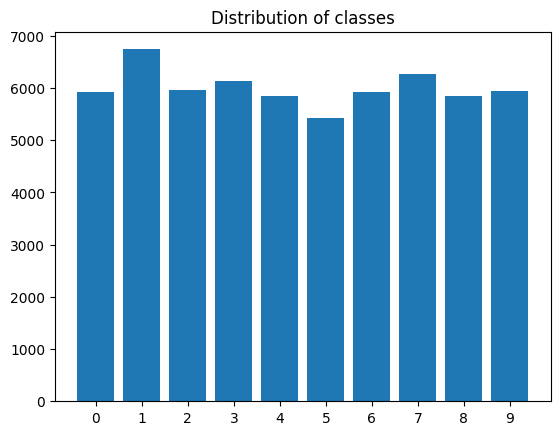

In [ ]:
s = pd.Series(y_train)
s = s.value_counts()
s = s.sort_index()
print(s)

plt.bar(range(10), s)
plt.title("Distribution of classes")
x = range(10)
plt.xticks(x)
plt.show()


We're dealing with a balanced dataset

# **Define the model**

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5, batch_size=64)
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test acc: {test_acc}")


Epoch 1/5
938/938 [==============================] - 58s 60ms/step - loss: 0.4069 - accuracy: 0.9480
Epoch 2/5
938/938 [==============================] - 56s 60ms/step - loss: 0.0553 - accuracy: 0.9844
Epoch 3/5
938/938 [==============================] - 56s 60ms/step - loss: 0.0402 - accuracy: 0.9887
Epoch 4/5
938/938 [==============================] - 58s 61ms/step - loss: 0.0346 - accuracy: 0.9908
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 0.0586 - accuracy: 0.9876
Test acc: 0.9876000285148621
